In this notebook the evolution of the concetration of NO2 in the city of Madrid, Spain in the period of January-April 2020 will be studied.

In [1]:
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import datetime
from statsmodels.api import OLS #For linear regression

from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
pollutant = 'NO2'

In [3]:
df = pd.read_csv('../clean_datasets/%s-2020.csv'%(pollutant), index_col=0, parse_dates=True)

In [4]:
df.head()

,estacion,concentracion
dt,,
2020-01-01,8,113.0
2020-01-01,24,57.0
2020-01-01,57,93.0
2020-01-01,11,104.0
2020-01-01,35,68.0


I'll be working with the average concentration throughout all stations per hour.

In [5]:
df = df.groupby('dt')['concentracion'].mean()
df = pd.DataFrame(df)

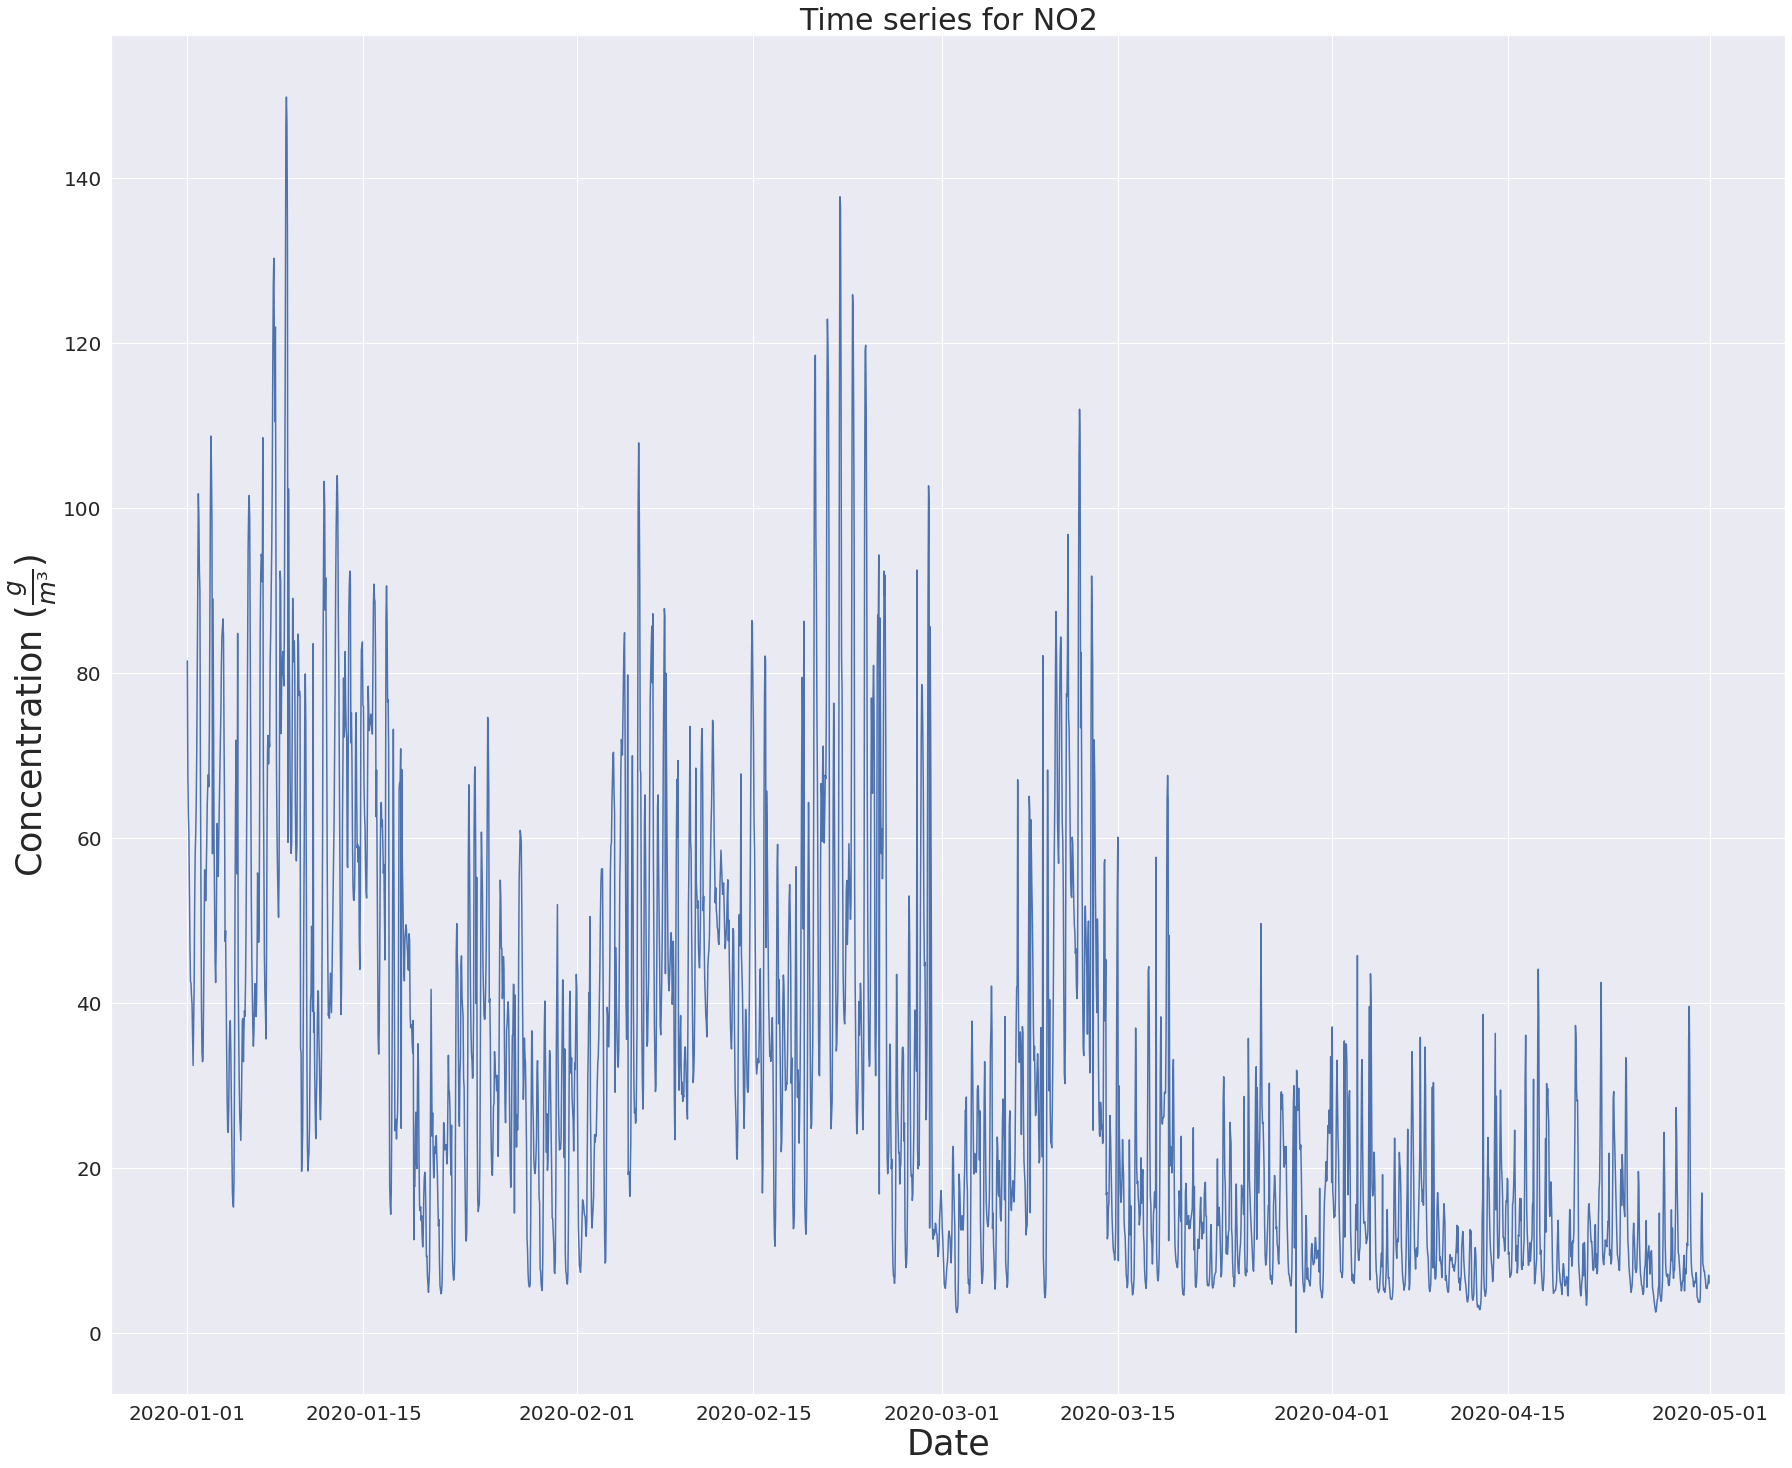

In [6]:
plt.figure(figsize=(30,25))
sns.lineplot(df.index, df['concentracion'])
plt.xlabel('Date', fontsize=35)
plt.ylabel(r'Concentration $(\frac{g}{m³})$', fontsize=35)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('Time series for ' + pollutant, fontsize=30);

I'll use a simple moving average to smooth out the curve.

In [9]:
days = [24, 48, 72, 96, 120]
for i in days:
    df['SMA' + str(i)] = df.loc[:,'concentracion'].rolling(window = i,
                                                min_periods = 1).mean()

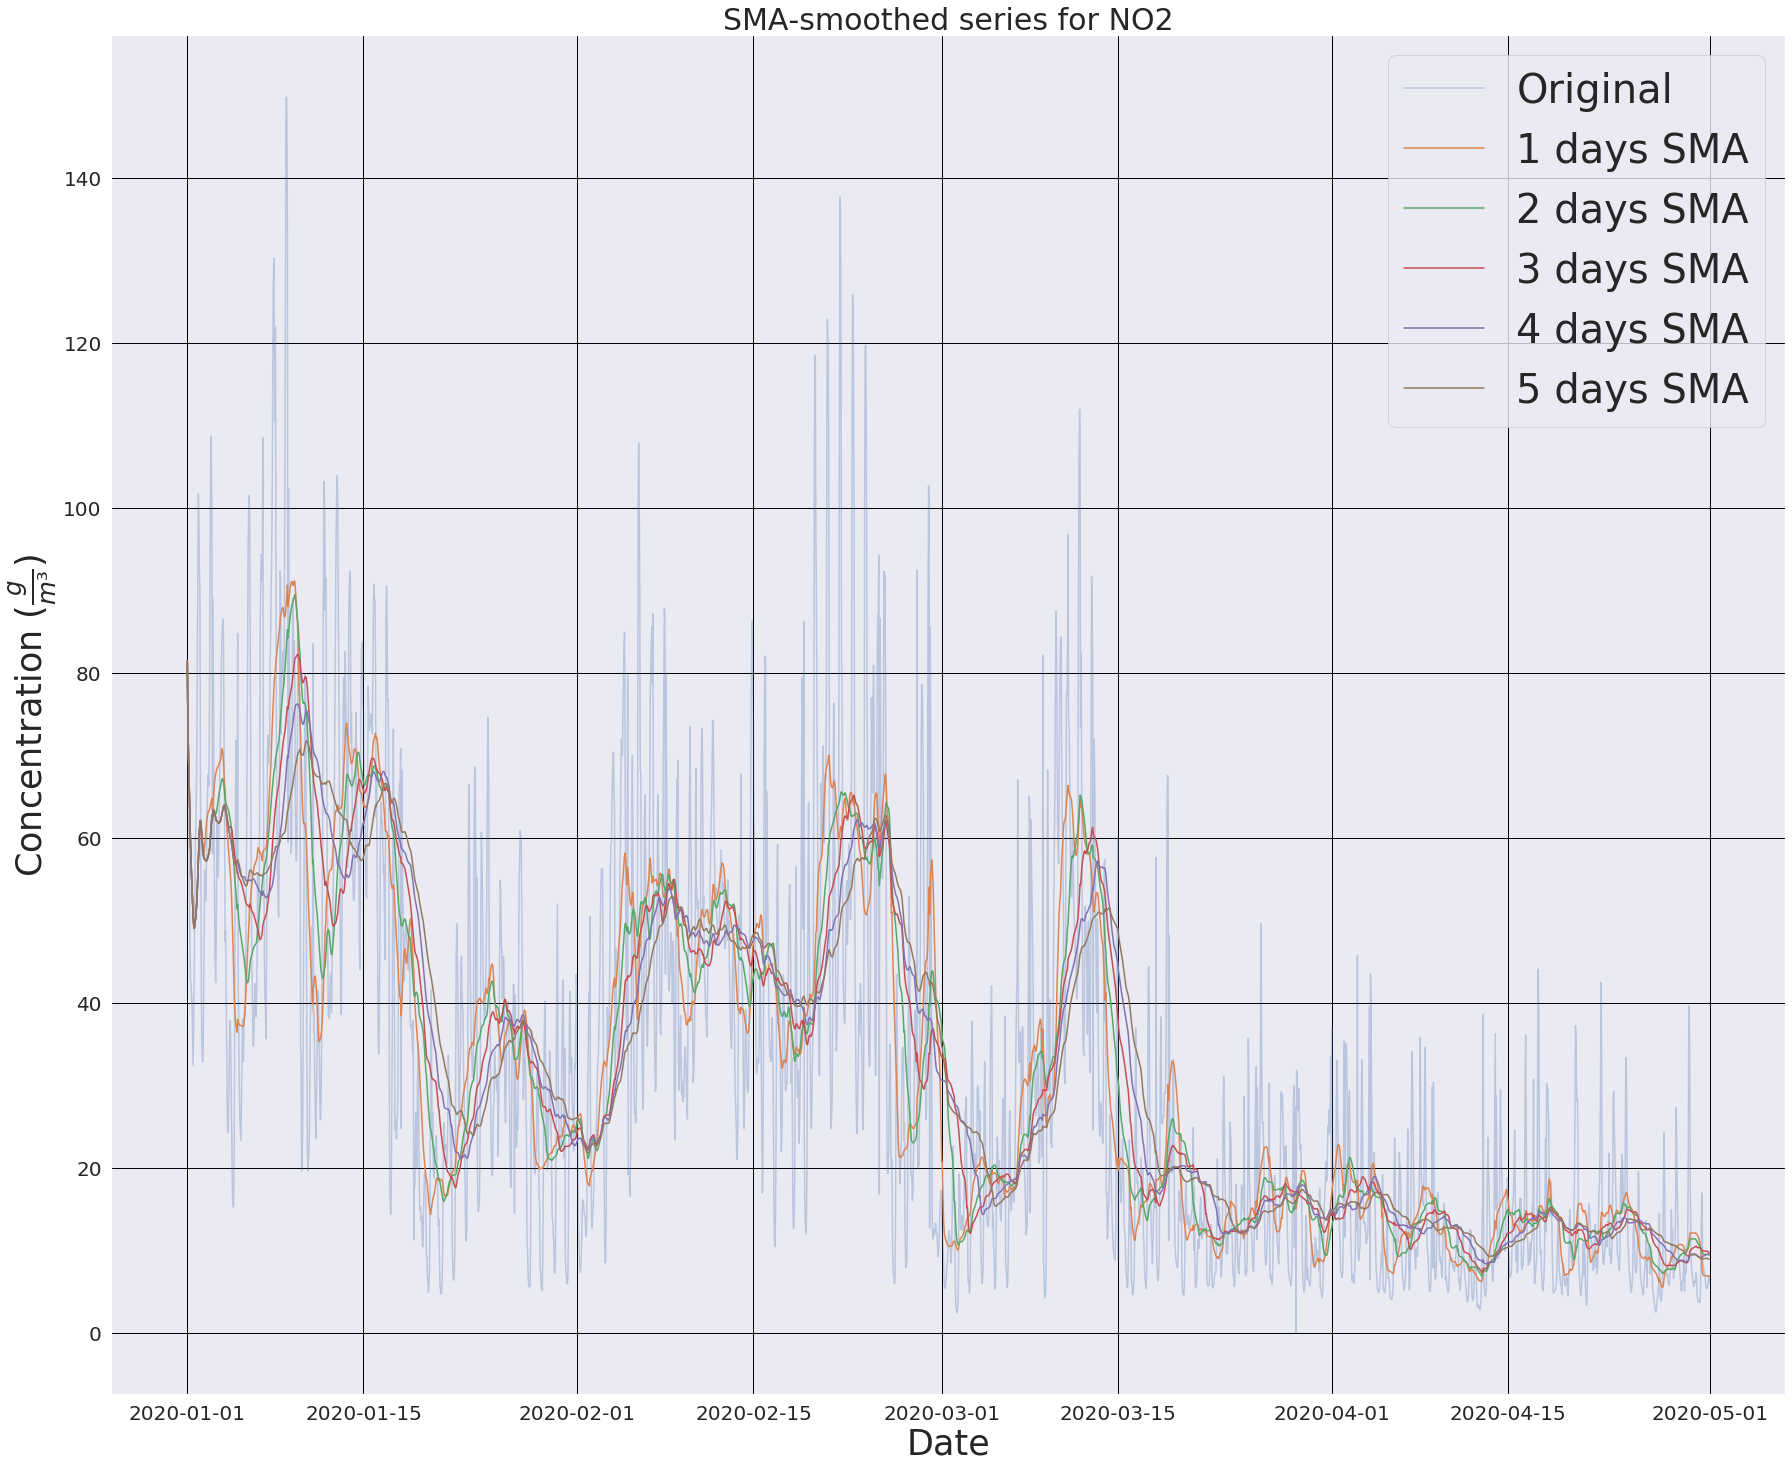

In [14]:
plt.figure(figsize=(30,25))
#sns.lineplot(df.index, df['concentracion'], color='blue', linestyle= ,label='original')
sns.lineplot(df.index, df['concentracion'], label='Original', alpha=0.3)
for i in days:
    sns.lineplot(df.index, df['SMA' + str(i)], label='%d days SMA'%(i/24))
plt.xlabel('Date', fontsize=35)
plt.ylabel(r'Concentration $(\frac{g}{m³})$', fontsize=35)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.grid(color = 'black')
plt.title('SMA-smoothed series for ' + pollutant, fontsize=30)
plt.legend(fontsize=40);

From the above the one-day SMA appears to model the behavior well, since other time intervals lag a little.

Trying an exponentially-weighted moving average:

In [ ]:
beta = 0.03
df['EWMA'] = np.zeros((len(df),1))
#Para el cálculo de las EWMA se usará el indexador iloc, donde la columna NO2 tiene valor 0 y la
#EWMA es 2
for i in range(len(df.index[1:])): 
    df.iloc[i,2] = beta*df.iloc[i,0] + (1 - beta)*df.iloc[i - 1,2]

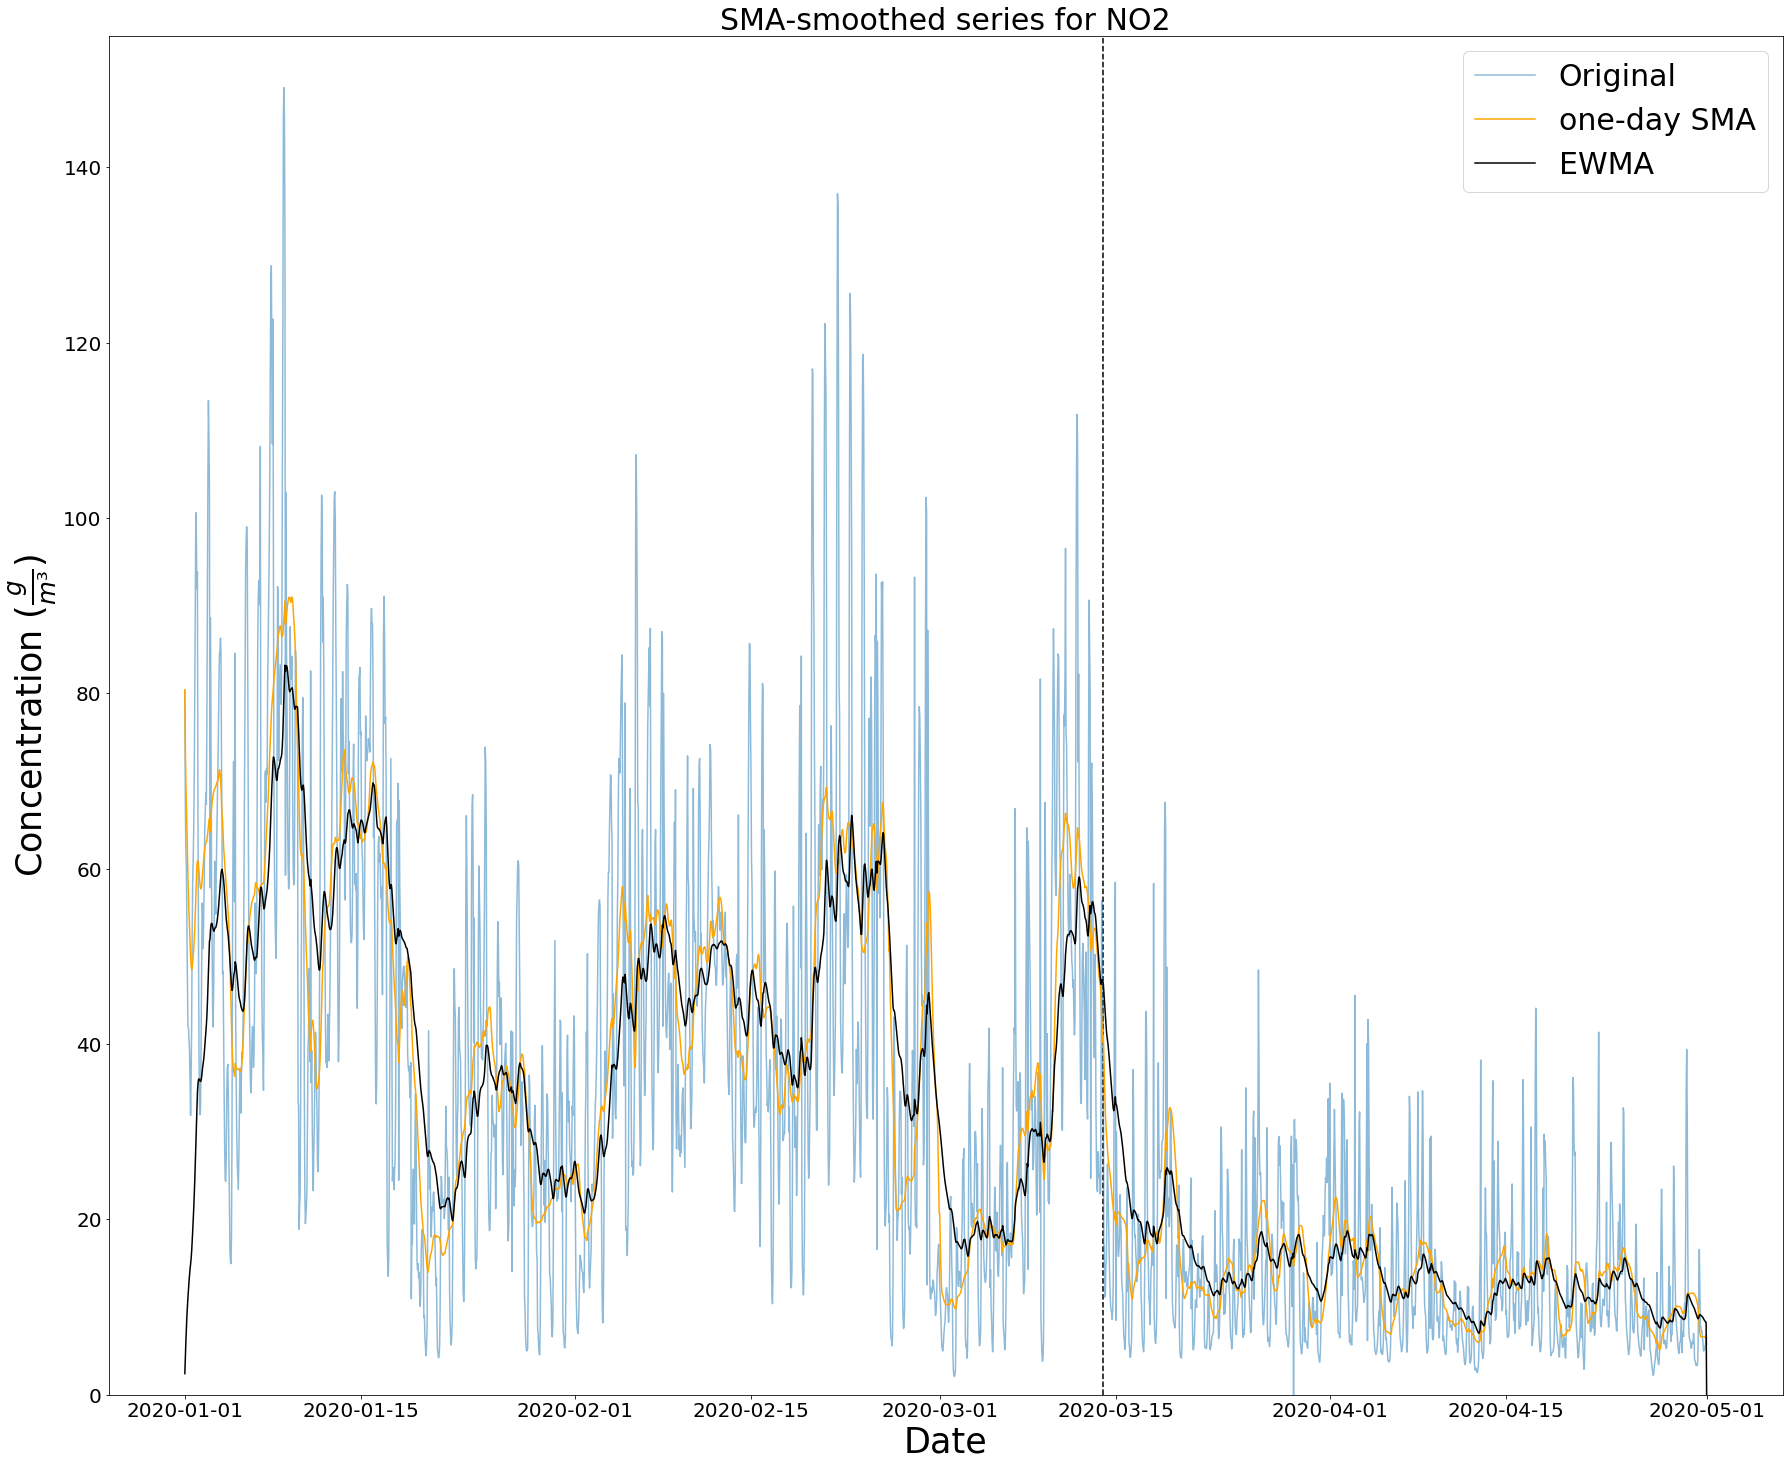

In [21]:
lockdown = dt.datetime(2020,3,14)

plt.figure(figsize=(30,25))
#sns.lineplot(df.index, df['concentracion'], color='blue', linestyle= ,label='original')
plt.plot(df.index, df['concentracion'], label='Original', alpha=0.5)
plt.plot(df.index, df['SMA'], label='one-day SMA', color='orange')
plt.plot(df.index, df['EWMA'], label='EWMA', color='black')
plt.xlabel('Date', fontsize=35)
plt.ylabel(r'Concentration $(\frac{g}{m³})$', fontsize=35)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylim(0,155)
#plt.grid(color = 'black')
plt.title('SMA-smoothed series for ' + pollutant, fontsize=30)
plt.legend(fontsize=30)
plt.vlines(lockdown, ymin = 0, ymax = 155, linestyle='--');

Once again, it appears shifted.